## Effects of Loan Characteristics on Borrower's APR

### Investigation Overview

In this investigation, I wanted to look at the characteristics of loans that could be used to predict their borrowers' APR. The main focus was on the original loan amount, borrowers' Prosper rating, loan term, borrowers' stated monthly income variables.

### Dataset Overview

The dataset consisted of borrower APRs and attributes of 113,937 loans. The attributes included the main / focus variables listed above, such as loan amount, borrowers' Prosper rating, loan term, borrowers' stated monthly income, as well as many others like borrower's employment status, credit grade, current loan status, etc. Rows with APR missing values were dropped (25 rows). Outliers were also removed to make the database more reliable (653 outliers). In the end 678 variables were dropped. 
The goal of this analysis is to understand which features could impact borrowers' APRs and how different loans were taken by borrowers with different ratings.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
loan = pd.read_csv('prosperLoanData.csv')
loan.shape

(113937, 81)

In [3]:
loansub = loan[['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome', 'Term', 'ProsperRating (Alpha)','EmploymentStatus']]
loansub

,LoanOriginalAmount,BorrowerAPR,StatedMonthlyIncome,Term,ProsperRating (Alpha),EmploymentStatus
0,9425,0.16516,3083.333333,36,NaN,Self-employed
1,10000,0.12016,6125.000000,36,A,Employed
2,3001,0.28269,2083.333333,36,NaN,Not available
3,10000,0.12528,2875.000000,36,A,Employed
4,15000,0.24614,9583.333333,36,D,Employed
...,...,...,...,...,...,...
113932,10000,0.22354,4333.333333,36,C,Employed
113933,2000,0.13220,8041.666667,36,A,Employed
113934,10000,0.23984,2875.000000,60,D,Employed
113935,15000,0.28408,3875.000000,60,C,Full-time


In [4]:
loansub = loansub[~loansub.BorrowerAPR.isna()]
loansub

,LoanOriginalAmount,BorrowerAPR,StatedMonthlyIncome,Term,ProsperRating (Alpha),EmploymentStatus
0,9425,0.16516,3083.333333,36,NaN,Self-employed
1,10000,0.12016,6125.000000,36,A,Employed
2,3001,0.28269,2083.333333,36,NaN,Not available
3,10000,0.12528,2875.000000,36,A,Employed
4,15000,0.24614,9583.333333,36,D,Employed
...,...,...,...,...,...,...
113932,10000,0.22354,4333.333333,36,C,Employed
113933,2000,0.13220,8041.666667,36,A,Employed
113934,10000,0.23984,2875.000000,60,D,Employed
113935,15000,0.28408,3875.000000,60,C,Full-time


In [5]:
loansub.rename(columns= {"LoanOriginalAmount":"Amount", "ProsperRating (Alpha)": "Rating", "StatedMonthlyIncome" : "MonthlyIncome", "BorrowerAPR": "APR"}, inplace= True)
loansub.head()

C:\Users\julia\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Amount,APR,MonthlyIncome,Term,Rating,EmploymentStatus
0,9425,0.16516,3083.333333,36,NaN,Self-employed
1,10000,0.12016,6125.000000,36,A,Employed
2,3001,0.28269,2083.333333,36,NaN,Not available
3,10000,0.12528,2875.000000,36,A,Employed
4,15000,0.24614,9583.333333,36,D,Employed


In [6]:
loansub=loansub[loansub.MonthlyIncome<25000]
loansub.shape

(113259, 6)

### Distribution of Borrower APR

The distribution of APR looks multimodal. There is an important peak at 0.35797, being this the biggest. Moreover, one can highlight another peak centered at 0.2, followed by other centered at 0.3 and then 0.1. Loans greater than 0.4 are scarce. The higher loan is at 0.512290 and seems an outlier. There are few loans with borrower's APR higher than 0.4.

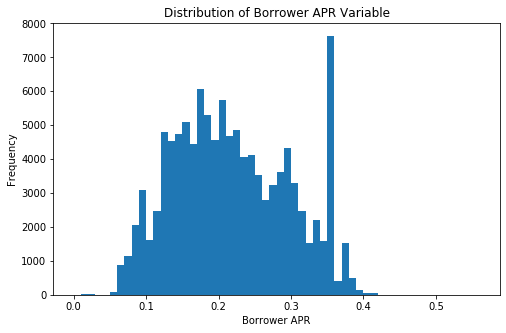

In [7]:
bins = np.arange(0, loansub.APR.max()+0.05, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = loansub, x = 'APR', bins = bins);
plt.xlabel('Borrower APR');
plt.ylabel('Frequency')
plt.title("Distribution of Borrower APR Variable");

### Distribution of  Loan Original Amount

The Loan Amount Distribution seems a bit right screwed. The majority of the loans seems to be lower than 20k. There are large peaks at 10k, 15k, medium ones at 5k, 20k and 25k and a smaller one at 35k. 
Looking at the describe function result, one can conclude that loans are multiples of 1k (Minimum value).

Text(0.5, 1.0, 'Distribution of Loan Original Amount')

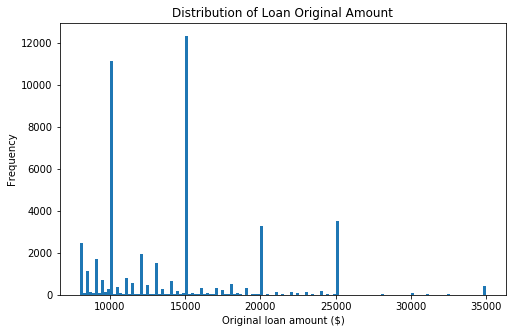

In [8]:
bins = np.arange(8000, loansub.Amount.max()+200, 200)
plt.figure(figsize=[8, 5])
plt.hist(data = loansub, x = 'Amount', bins = bins);
plt.xlabel('Original loan amount ($)');
plt.ylabel('Frequency')
plt.title("Distribution of Loan Original Amount")

### Borrower APR vs. Loan Amount

There is a negative relationship between Borrower APR and Loan Amount. Moreover, the APR variable has a large range for different sizes of the loan amounts, but the range of APR decrease with the increase of loan amount.

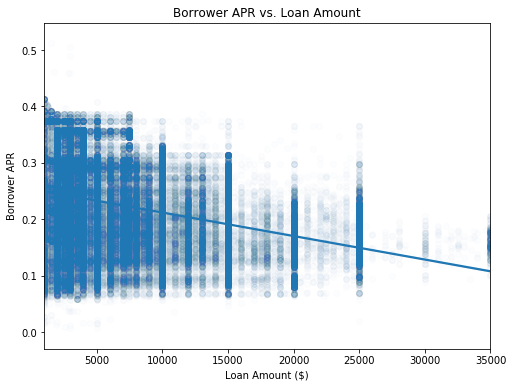

In [9]:

plt.figure(figsize = [8, 6])
sb.regplot(data = loansub, x = 'Amount', y = 'APR', scatter_kws={'alpha':0.01});  
plt.xlabel('Loan Amount ($)')
plt.ylabel('Borrower APR')
plt.title('Borrower APR vs. Loan Amount');

### Borrower APR vs. Prosper Rating

There is a negative relationship between Prosper Rating and Borrower APR. For higher / better Ratings, Borrower APR are lower.

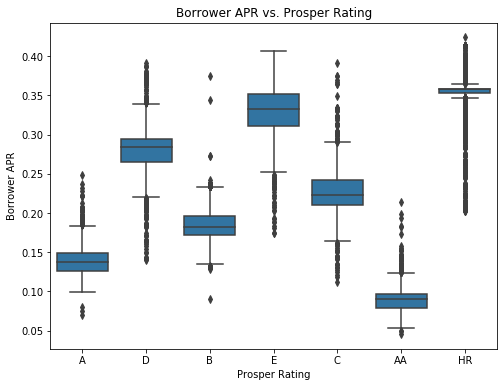

In [10]:
plt.figure(figsize=[8,6])
default_color = sb.color_palette()[0]
sb.boxplot(data=loansub, x='Rating', y='APR', color=default_color)
plt.xlabel('Prosper Rating')
plt.ylabel('Borrower APR')
plt.title('Borrower APR vs. Prosper Rating');

### Prosper Rating Effect on the Relationship between APR and Loan Amount

Better ratings result in higher loan amounts and lower Borrowers' APRs.
Although the relationship between borrower APR and loan amount is negative, it turns to slightly positive when the Prosper ratings are equal to A or AA. 
One can try to explain this by the fact that borrowers with A or AA ratings usually borrow more money, thus higher APRs could prevent them borrow even more. In the other hand, lower ratings borrowers tend to borrow less money, decreasing APR make them to borrow more.

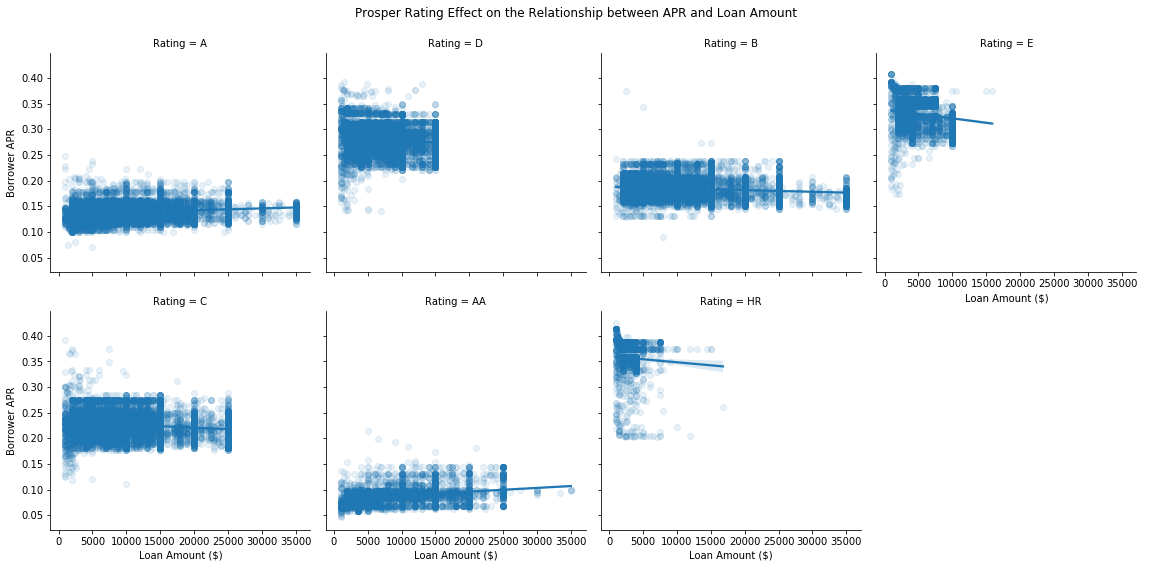

In [11]:
g=sb.FacetGrid(data=loansub,col='Rating', height=4, col_wrap=4)
g.map(sb.regplot, 'Amount', 'APR', x_jitter=0.04, scatter_kws={'alpha':0.1});
#g.set_titles('{col_name}')
g.add_legend();
g.set_xlabels('Loan Amount ($)')
g.set_ylabels('Borrower APR')
plt.suptitle('Prosper Rating Effect on the Relationship between APR and Loan Amount');
plt.subplots_adjust(top=0.9)

### Borrower APR across Rating and Term

The borrower APR decreases with the increase of borrow term for people with HR-C ratings.
However, for borrowers with B-AA ratings, the APR increases with the increase of borrow term.

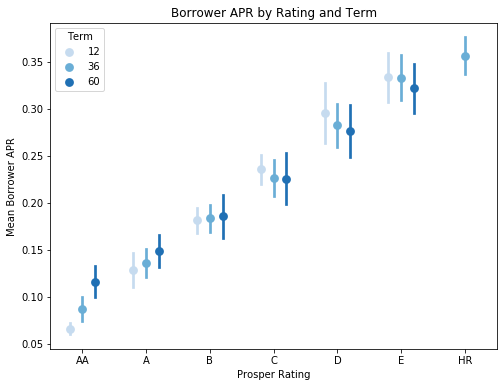

In [12]:
fig = plt.figure(figsize = [8,6])
gen_order=['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
ax = sb.pointplot(data = loansub, x = 'Rating', y = 'APR', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd', order=gen_order)
plt.title('Borrower APR across rating and term')
plt.ylabel('Mean Borrower APR')
plt.xlabel('Prosper Rating')
plt.title('Borrower APR by Rating and Term');

### Stated Monthly Income and Loan Original Amount across Rating and Term variables

When looking at the monthly income graphic, one can identify that borrowers with higher monthly incomes have higher ratings. Moreover, one can say that, among all different rating categories, there is the same pattern in the loan term, being the 12 months loan the most common one, except for B and HR rating categories.
Also, surprisingly loans with 60 months are more common than those with 36 months long, except for borrowers with AA rating category.
However, when looking at the loan amount, we can notice a strong relationship between loan term and Prosper rating. On better Prosper ratings, the loan amount on all three terms increases, the size of the increase / loan amplitude between terms also becomes larger.

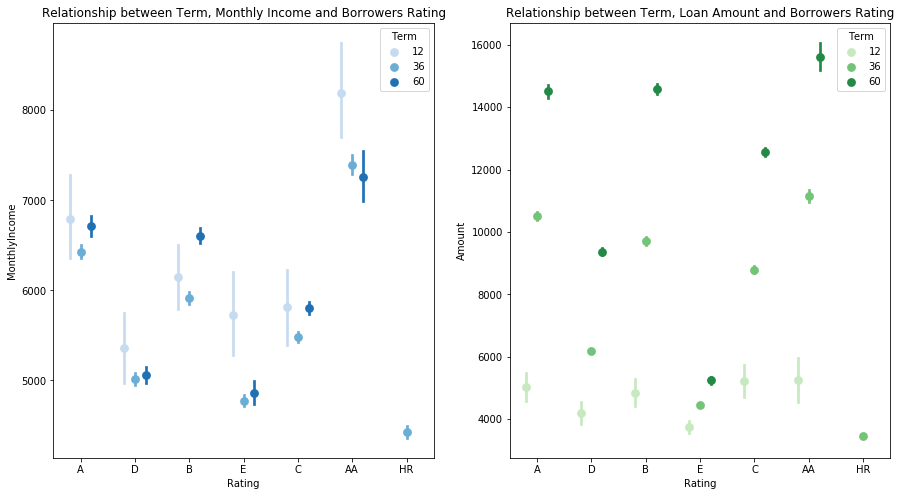

In [13]:
fig, ax = plt.subplots(ncols=2, figsize=[15,8])
sb.pointplot(data = loansub, x = 'Rating', y = 'MonthlyIncome', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ax=ax[0]).set_title('Relationship between Term, Monthly Income and Borrowers Rating')
sb.pointplot(data = loansub, x = 'Rating', y = 'Amount', hue = 'Term',
           palette = 'Greens', linestyles = '', dodge = 0.4, ax=ax[1]).set_title('Relationship between Term, Loan Amount and Borrowers Rating');


### Key Findings:

- Borrower APR is negatively correlated with Loan Amount - At different size of the loan amount, the APR has a large range, but the range of APR decrease with the increase of loan amount.
- Borrower APR decreases when Proper’s ratings become better
- The strongest effect between numerical and categorical variables is between Loan Amount and Monthly Income. The correlation coefficient is 0.41, therefore, there is a positive relation between the borrowers' monthly income and the amount is lent to them, as expected.
- Concerning Proper’s ratings vs. Loan’s amounts & Prosper APR: the relationship between borrower APR and loan amount turns from negative to slightly positive when the Prosper ratings are equal to AA or A. This might be because people with A or AA ratings tend to borrow higher amounts, increasing APR could prevent them to borrow even more. While decreasing APR could encourage lower rating borrowers to borrow more.

### Key Findings (continue):

- The borrower APR decreases with the increase of borrow term for people with HR-C ratings. However, for borrowers with B-AA ratings, the APR increases with the increase of borrow term.
- As expected, borrowers with better ratings have larger monthly income and loans’ amount.
- Although we see a negative relationship between APR and Monthly Income, it doesn't seem true for Ratings equal to A, HR and D. It couldn't find a clear explanation for that.
- The 36 months loans is the most common type of loan among all employment status categories
- There is a positive relationship between loan amount and loan term
- Employed and full-time workers borrowers seem to receive more loans
- On better Prosper ratings, the loan amount on all three terms increases, the size of the increase / loan amplitude between terms also becomes larger.

In [ ]:
!jupyter nbconvert "slide_deck_ProsperLoan.ipynb" --to slides --post serve --template output_toggle